In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.impute import SimpleImputer

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("prosperLoanData.csv")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.0906

In [4]:
df_cols = df.columns
len(df.columns), df_cols

(81,
 Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
        'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
        'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
        'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
        'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
        'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
        'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
        'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
        'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
        'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
        'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
        'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilizati

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Check The Missing Values

In [7]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

Visualizing The Missing Values

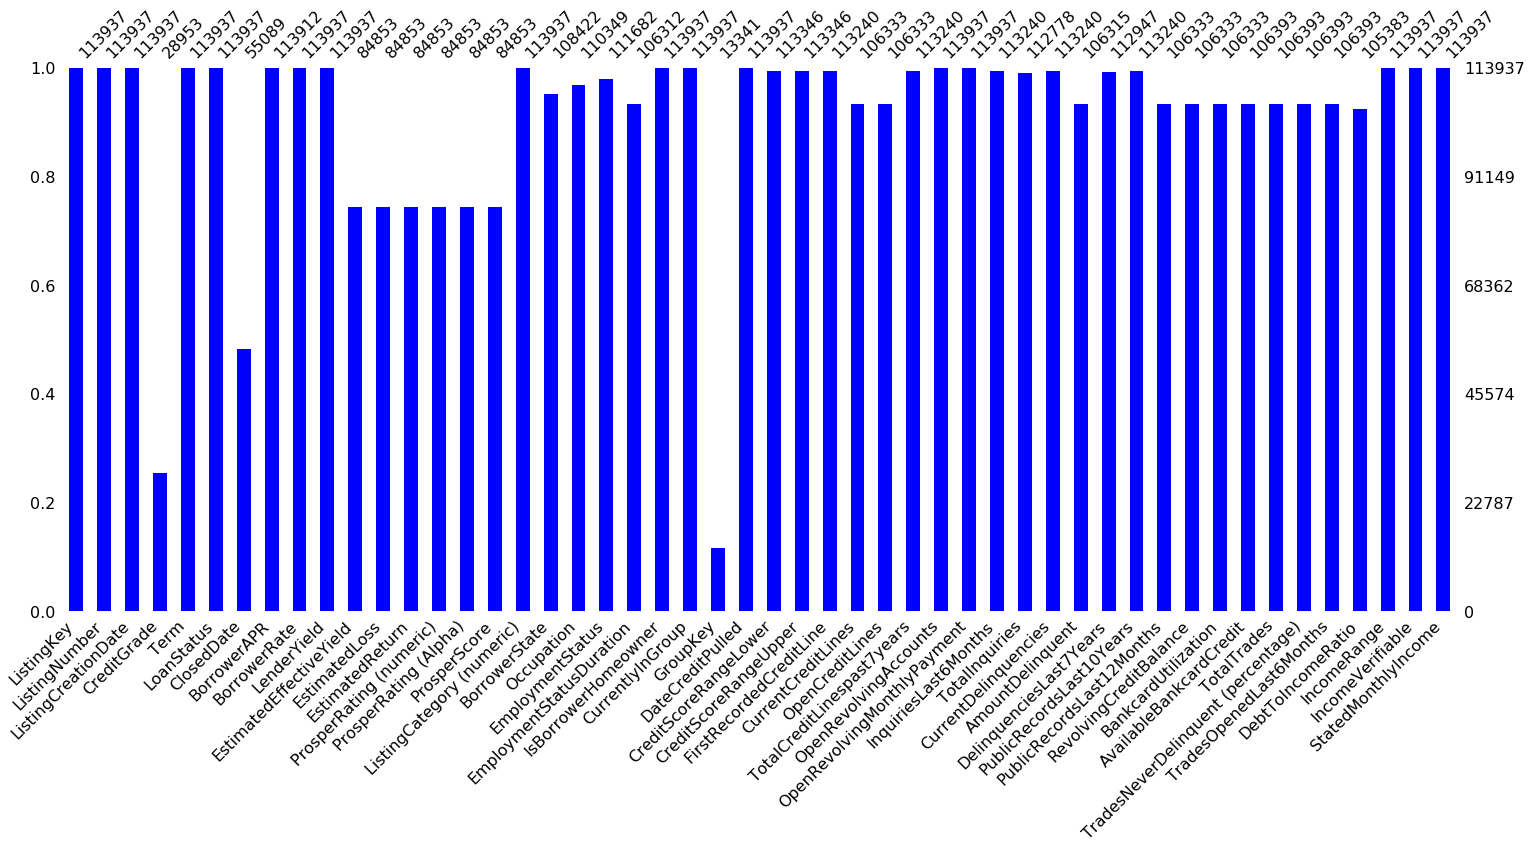

In [8]:
msno.bar(df[:][df_cols[:50]], color='b')

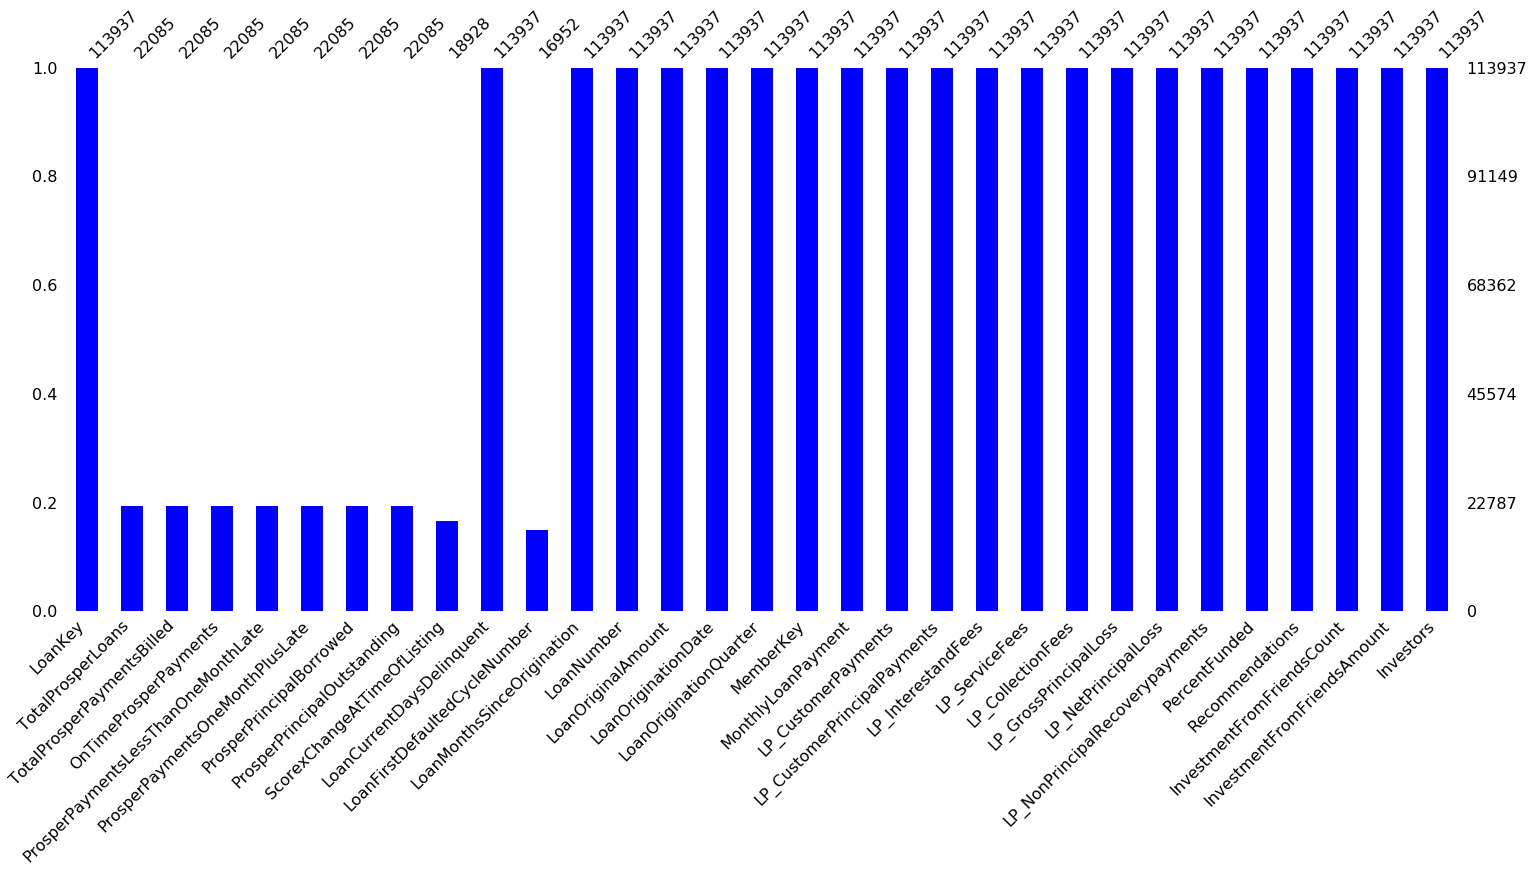

In [9]:
msno.bar(df[:][df_cols[50:]], color='b')

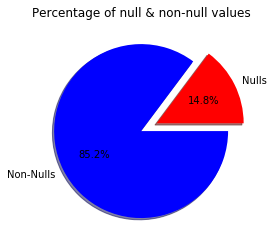

In [10]:
notnullsum = df.notnull().sum().sum()
nullsum = df.isnull().sum().sum()

plt.pie(np.array([nullsum, notnullsum]).ravel(), labels=['Nulls', 'Non-Nulls'], colors=["r", "b"], autopct='%1.1f%%', explode=[0.2, 0], shadow=True)
plt.title("Percentage of null & non-null values")
plt.show()

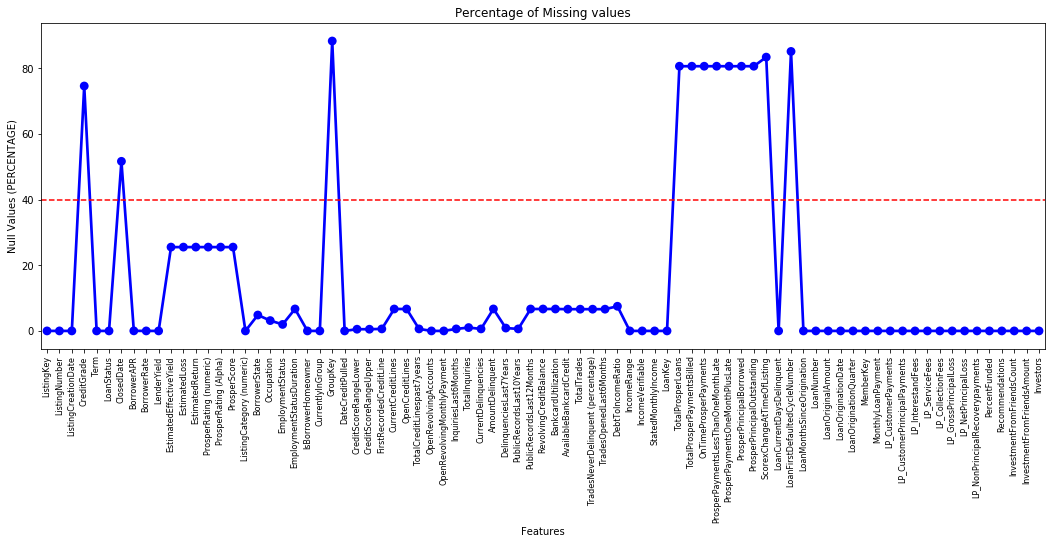

In [11]:
null_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_df.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_df, color='blue')
plt.xticks(rotation=90, fontsize=8)
ax.axhline(40, ls='--', color='red')
plt.title("Percentage of Missing values")
plt.ylabel("Null Values (PERCENTAGE)")
plt.xlabel("Features")
plt.show()

In [12]:
corr = df.corr()
corr

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,0.127062,0.156224,0.076745,-0.439653,0.269395,0.269395,0.145621,0.195707,0.130369,0.232109,0.184101,-0.298941,-0.280228,-0.233326,-0.024627,-0.078336,-0.045467,-0.073151,0.057056,0.086053,0.036690,0.134729,0.254659,-0.084531,-0.041810,-0.024027,0.076113,0.174834,0.131672,0.132063,0.020873,-0.005101,0.252583,0.164248,-0.126409,-0.370226,-0.155062,-0.939179,0.995095,0.340360,0.277267,-0.380814,-0.366555,-0.281170,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,0.004947,0.082476,0.085339,-0.143751,0.126263,0.126263,0.077072,0.096309,0.076528,0.093637,0.084049,-0.113568,-0.103132,-0.083807,-0.016459,-0.041492,-0.029512,-0.026252,0.026022,0.031535,0.015348,0.079650,0.119342,-0.029476,-0.014670,0.040402,0.028479,0.070311,0.002462,0.003147,-0.002912,-0.008328,0.130493,0.153372,-0.048157,-0.134134,-0.070819,-0.342130,0.335610,0.338927,0.091026,-0.069696,-0.128255,0.158890,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,0.132456,-0.008589,-0.132823,-0.054567,-0.429707,-0.429707,-0.093481,-0.098860,0.002513,-0.110202,-0.043365,0.146119,0.114546,0.149404,0.065679,0.162225,0.122793,0.044095,-0.058539,0.261438,-0.348926,-0.041894,-0.241349,0.103527,0.056327,-0.109975,-0.082338,-0.041467,0.031399,0.018632,0.091034,0.055345,-0.206209,-0.090347,-0.231962,0.088032,-0.185956,-0.073773,-0.036269,-0.322887,-0.226653,-0.111350,-0.180445,0.169726,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,0.102913,-0.019907,-0.134431,-0.001964,-0.461567,-0.461567,-0.097473,-0.105998,-0.005793,-0.125987,-0.055628,0.183810,0.153129,0.176530,0.065645,0.170279,0.128314,0.051169,-0.059608,0.255482,-0.343861,-0.048211,-0.261189,0.114538,0.062917,-0.099540,-0.088982,-0.049270,0.019217,0.006996,0.085770,0.050770,-0.206461,-0.085685,-0.217155,0.136244,-0.172936,0.020420,-0.118721,-0.328960,-0.244742,-0.081055,-0.153722,0.200479,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,0.104395,-0.018954,-0.132993,-0.012683,-0.454350,-0.454350,-0.

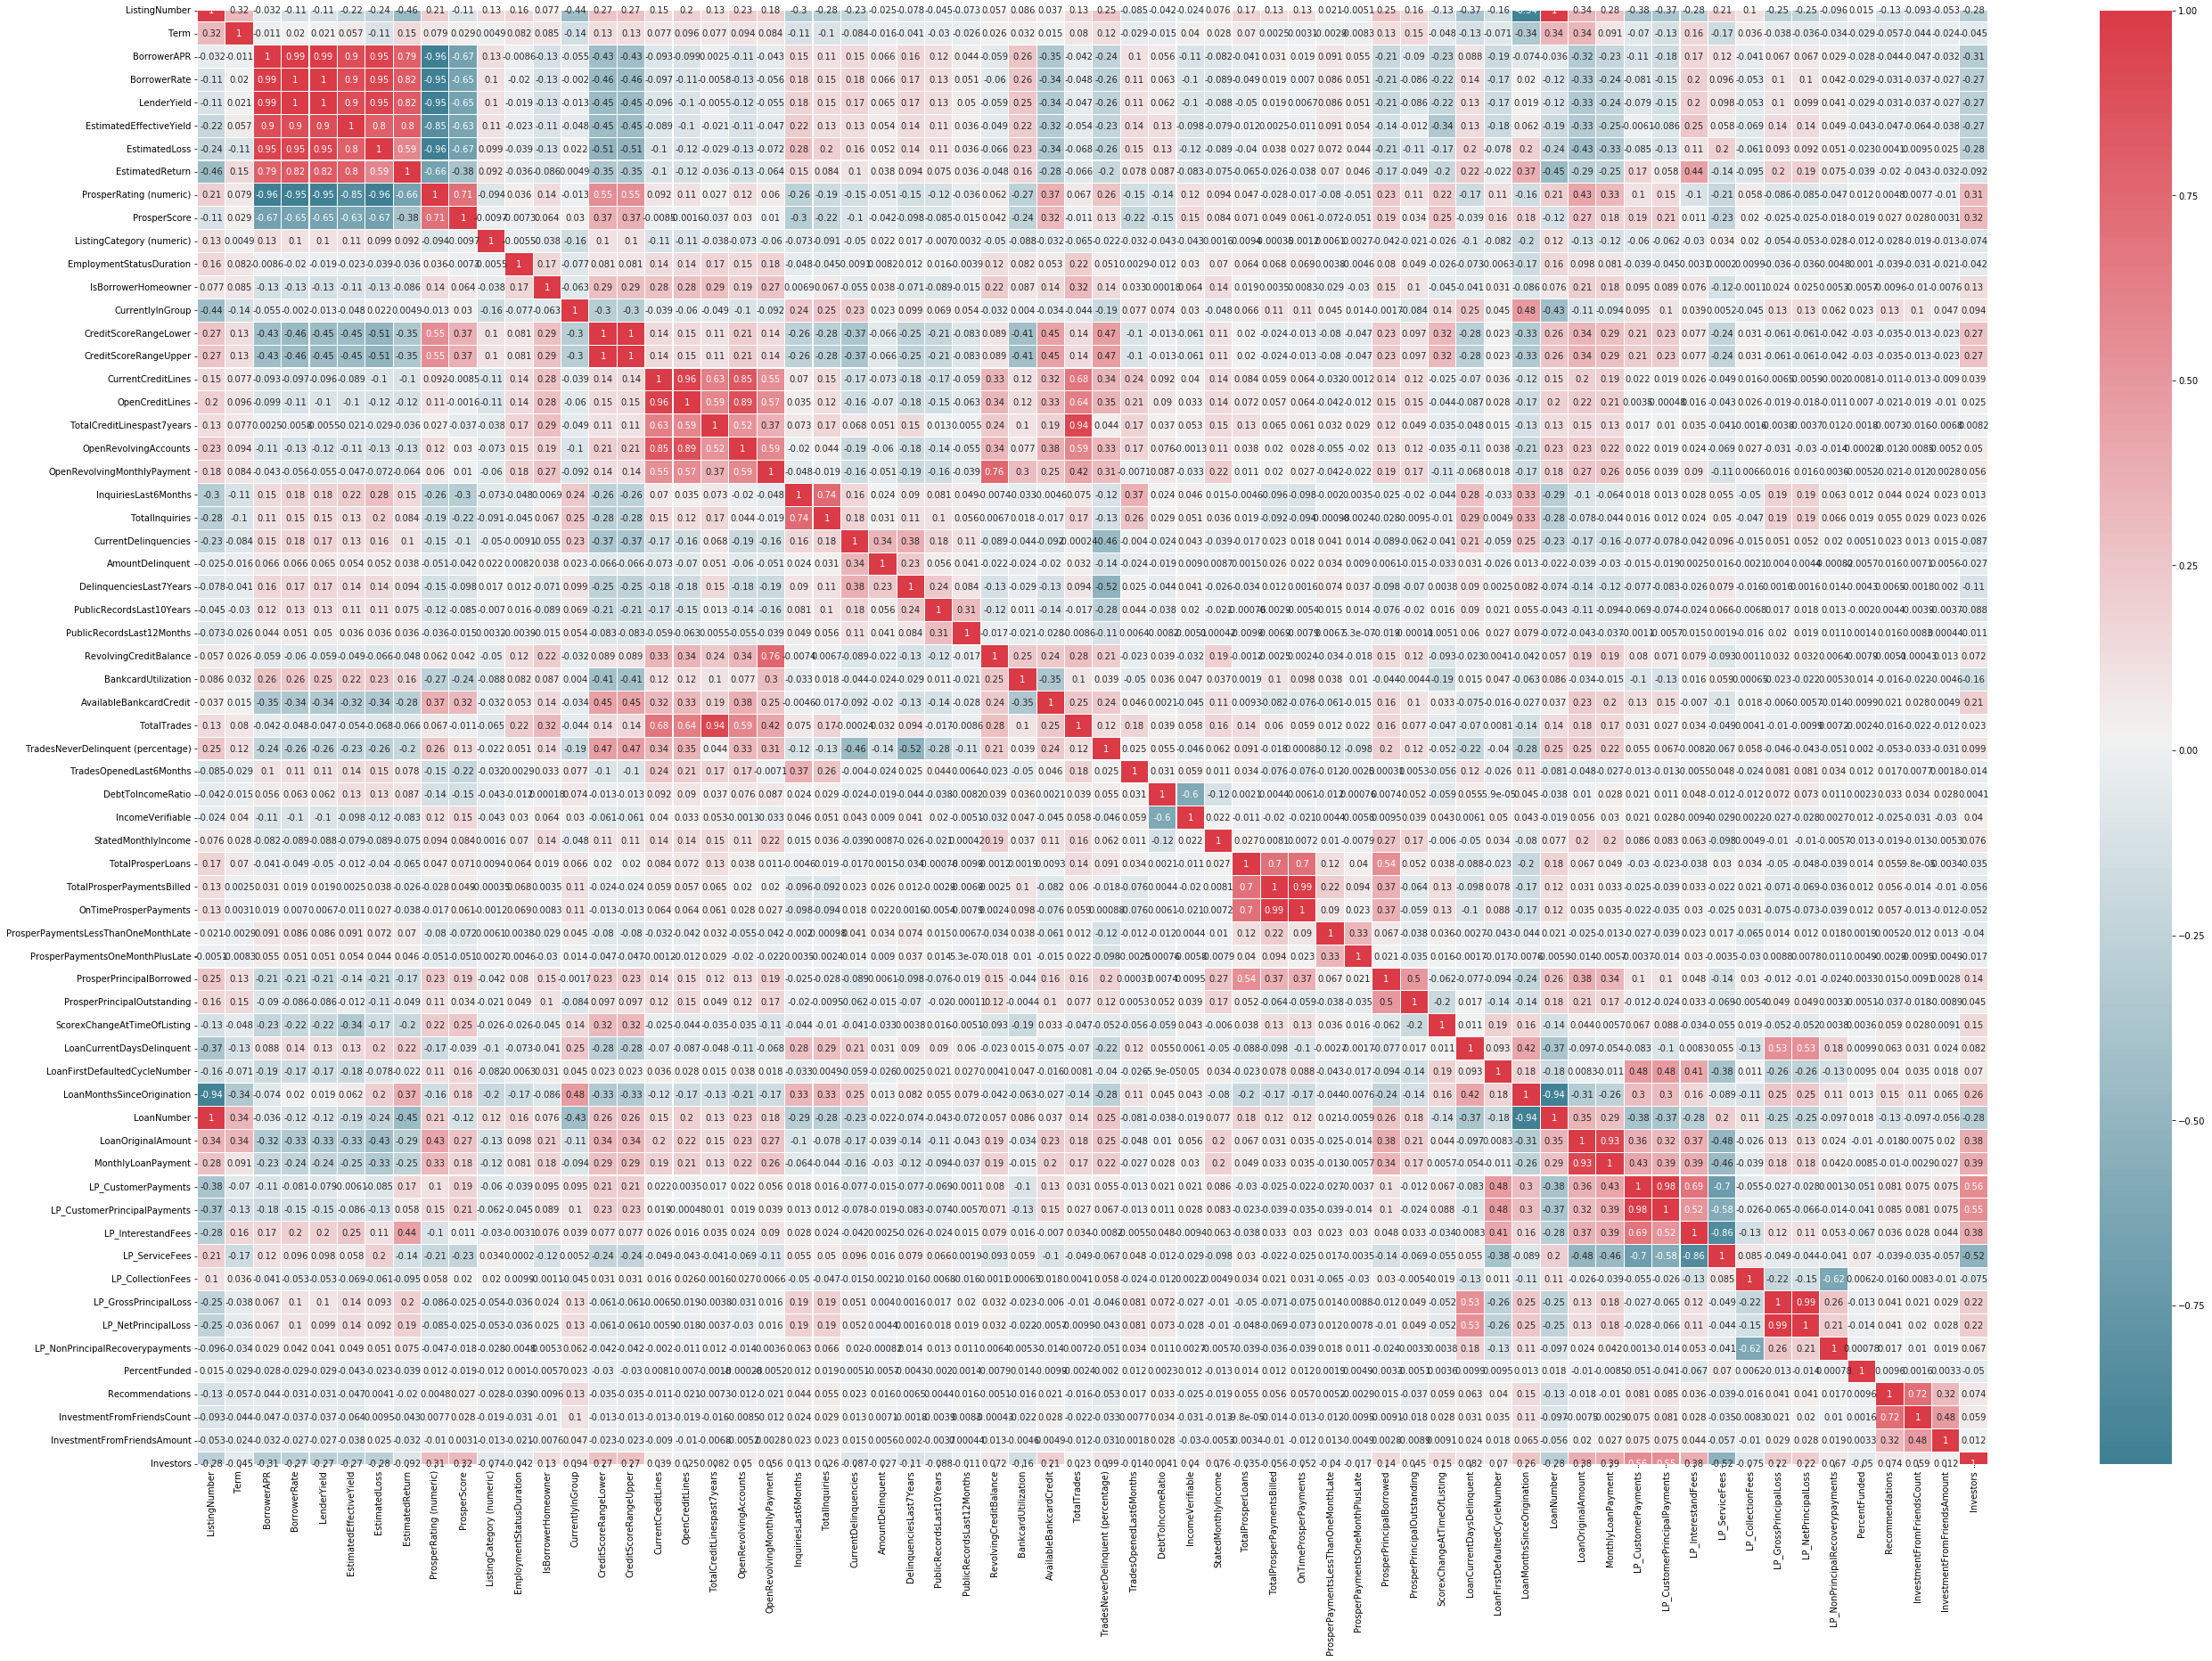

In [13]:
plt.figure(figsize=(45,30))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=colormap, linewidths=0.1, vmax=1.0, linecolor='white')

# Data Cleaning

### Approach 1 --> Drop Null Values
1) Drop Rows Which Contain Null Values

In [14]:
del_rows = df.dropna()
del_rows

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


2) Drop Columns Which Contain Null Values

In [15]:
del_cols = df.dropna(axis=1)
del_cols

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.1580,0.1380,0,True,True,2007-08-26 18:41:46.780000000,1,24.0,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.0920,0.0820,2,False,False,2014-02-27 08:28:14,13,389.0,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,0,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.2750,0.2400,0,False,True,2007-01-02 14:09:10.060000000,0,0.0,Not displayed,True,2083.333333,6954337960046817851BCB2,0,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.0974,0.0874,16,True,False,2012-10-22 11:02:32,7,115.0,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.2085,0.1985,2,True,False,2013-09-14 18:38:44,6,220.0,"$100,000+",True,9583.333333,A180369302188889200689E,0,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.8500,1563.22,1256.6300,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,36,Current,0.1864,0.1764,1,True,False,2013-04-14 05:54:58,9,209.0,"$50,000-74,999",True,4333.333333,9BD7367919051593140DB62,0,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,0.1110,0.1010,7,True,False,2011-11-03 20:42:53,9,495.0,"$75,000-99,999",True,8041.666667,62D93634569816897D5A276,0,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,60,Current,0.2150,0.2050,1,True,False,2013-12-13 05:49:15,9,521.0,"$25,000-49,999",True,2875.000000,DD1A370200396006300ACA0,0,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,60,Completed,0.2605,0.2505,2,True,False,2011-11-14 13:18:24,7,488.0,"$25,000-49,999",True,3875.000000,589536350469116027ED11B,0,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


### Approach 2 --> Filling The Null Values

In [16]:
copy_df = df.copy()
copy_df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

1. Quantitative (Numeric)

In [17]:
numerics = ['int64', 'float64']
numeric_cols = copy_df.select_dtypes(include=numerics).columns
len(numeric_cols), numeric_cols

(61,
 Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
        'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
        'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
        'EmploymentStatusDuration', 'CreditScoreRangeLower',
        'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
        'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
        'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
        'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilization',
        'AvailableBankcardCredit', 'TotalTrades',
        'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
        'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
        'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
        'ProsperPaymentsLe

In [18]:
numeric_cols = numeric_cols.drop(['InvestmentFromFriendsCount', 'ListingCategory (numeric)'])
copy_df.InvestmentFromFriendsCount.isnull().sum().sum(), len(numeric_cols), numeric_cols

(0,
 59,
 Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
        'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
        'ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration',
        'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
        'OpenCreditLines', 'TotalCreditLinespast7years',
        'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
        'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
        'AmountDelinquent', 'DelinquenciesLast7Years',
        'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilization',
        'AvailableBankcardCredit', 'TotalTrades',
        'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
        'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
        'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
        'ProsperPaymentsLessThanOneMonthLate',
    

In [19]:
copy_df[numeric_cols] = copy_df[numeric_cols].fillna(method='bfill', axis=0).fillna(0)
copy_df[numeric_cols].tail()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsAmount,Investors
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,246.0,700.0,719.0,9.0,9.0,41.0,9,209.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,7714.0,0.80,1886.0,37.0,0.83,3.0,0.13,4333.333333,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,0.0,11,88485,10000,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,0.0,0.0,0.0,1.0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,21.0,700.0,719.0,14.0,13.0,39.0,9,495.0,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,15743.0,0.69,6658.0,39.0,0.92,0.0,0.11,8041.666667,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,0.0,28,55801,2000,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,84.0,700.0,719.0,12.0,12.0,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,2875.000000,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,0.0,3,123122,10000,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,94.0,680.0,699.0,11.0,11.0,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,3875.000000,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,0.0,28,56401,15000,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0.0,274
113936,1140093,36,0.13189,0.1039,0.0939,0.09071,0.0299,0.06081,6.0,7.0,244.0,680.0,699.0,10.0,9.0,44.0,8,289.0,0.0,1.0,1.0,257.0,3.0,1.0,0.0,6166.0,0.80,675.0,36.0,0.75,0.0,0.23,4583.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,2,127508,2000,64.90,64.3307,47.25,17.0807,-1.70,0.0,0.0,0.0,0.0,1.0,0,0.0,1


In [20]:
copy_df[numeric_cols].isnull().sum().sum()

0

2. Boolean

In [21]:
bool_cols = copy_df.select_dtypes(include='bool').columns
len(bool_cols), bool_cols

(3,
 Index(['IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable'], dtype='object'))

In [22]:
copy_df[bool_cols] = copy_df[bool_cols].fillna(method='bfill', axis=0).fillna(0)
copy_df[bool_cols].tail()

,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
113932,True,False,True
113933,True,False,True
113934,True,False,True
113935,True,False,True
113936,False,False,True


In [23]:
copy_df[bool_cols].isnull().sum()

IsBorrowerHomeowner    0
CurrentlyInGroup       0
IncomeVerifiable       0
dtype: int64

3. Qualitative (Categorical)

In [24]:
obj_cols = copy_df.select_dtypes(include='O').columns
len(obj_cols), obj_cols

(17,
 Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
        'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
        'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
        'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey',
        'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey'],
       dtype='object'))

In [25]:
date_cols = ['ListingCreationDate', 'ClosedDate', 'LoanOriginationDate']
obj_cols = obj_cols.drop(date_cols)

In [26]:
copy_df[obj_cols].isnull().sum()

ListingKey                      0
CreditGrade                 84984
LoanStatus                      0
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
LoanKey                         0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [27]:
def fill_cat_with_most_freq(df, obj_cols):
    for col in obj_cols:
        df[col] = df[col].fillna(method='bfill', axis=0).fillna(df[col].mode())
    return df[obj_cols]

copy_df[obj_cols] = fill_cat_with_most_freq(copy_df, obj_cols)
copy_df[obj_cols]

,ListingKey,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,C,Completed,A,CO,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,HR,Current,A,CO,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,HR,Completed,A,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,C,Current,A,GA,Skilled Labor,Employed,EF543365873906104DC9A04,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,C,Current,D,MN,Executive,Employed,EF543365873906104DC9A04,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,NaN,Current,C,IL,Food Service Management,Employed,NaN,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,NaN,FinalPaymentInProgress,A,PA,Professional,Employed,NaN,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,NaN,Current,D,TX,Other,Employed,NaN,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,NaN,Completed,C,GA,Food Service,Full-time,NaN,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,Q4 2011,A33834861822272782621C8


### Approach 3 --> Custom Approach

1. Dropping Unnecessary Columns

In [28]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.0906

In [29]:
len(df.isnull().columns), list(df.isnull().columns)

(81,
 ['ListingKey',
  'ListingNumber',
  'ListingCreationDate',
  'CreditGrade',
  'Term',
  'LoanStatus',
  'ClosedDate',
  'BorrowerAPR',
  'BorrowerRate',
  'LenderYield',
  'EstimatedEffectiveYield',
  'EstimatedLoss',
  'EstimatedReturn',
  'ProsperRating (numeric)',
  'ProsperRating (Alpha)',
  'ProsperScore',
  'ListingCategory (numeric)',
  'BorrowerState',
  'Occupation',
  'EmploymentStatus',
  'EmploymentStatusDuration',
  'IsBorrowerHomeowner',
  'CurrentlyInGroup',
  'GroupKey',
  'DateCreditPulled',
  'CreditScoreRangeLower',
  'CreditScoreRangeUpper',
  'FirstRecordedCreditLine',
  'CurrentCreditLines',
  'OpenCreditLines',
  'TotalCreditLinespast7years',
  'OpenRevolvingAccounts',
  'OpenRevolvingMonthlyPayment',
  'InquiriesLast6Months',
  'TotalInquiries',
  'CurrentDelinquencies',
  'AmountDelinquent',
  'DelinquenciesLast7Years',
  'PublicRecordsLast10Years',
  'PublicRecordsLast12Months',
  'RevolvingCreditBalance',
  'BankcardUtilization',
  'AvailableBankcardCre

In [30]:
df.drop(columns=['ListingKey', 'ListingNumber', 'GroupKey', 'LoanKey', 'MemberKey', 'ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'LoanOriginationDate'], inplace=True)

In [31]:
len(df.isnull().columns), list(df.isnull().columns)

(72,
 ['CreditGrade',
  'Term',
  'LoanStatus',
  'BorrowerAPR',
  'BorrowerRate',
  'LenderYield',
  'EstimatedEffectiveYield',
  'EstimatedLoss',
  'EstimatedReturn',
  'ProsperRating (numeric)',
  'ProsperRating (Alpha)',
  'ProsperScore',
  'ListingCategory (numeric)',
  'BorrowerState',
  'Occupation',
  'EmploymentStatus',
  'EmploymentStatusDuration',
  'IsBorrowerHomeowner',
  'CurrentlyInGroup',
  'CreditScoreRangeLower',
  'CreditScoreRangeUpper',
  'FirstRecordedCreditLine',
  'CurrentCreditLines',
  'OpenCreditLines',
  'TotalCreditLinespast7years',
  'OpenRevolvingAccounts',
  'OpenRevolvingMonthlyPayment',
  'InquiriesLast6Months',
  'TotalInquiries',
  'CurrentDelinquencies',
  'AmountDelinquent',
  'DelinquenciesLast7Years',
  'PublicRecordsLast10Years',
  'PublicRecordsLast12Months',
  'RevolvingCreditBalance',
  'BankcardUtilization',
  'AvailableBankcardCredit',
  'TotalTrades',
  'TradesNeverDelinquent (percentage)',
  'TradesOpenedLast6Months',
  'DebtToIncomeRatio

2. Filling The Missing Values (With 1- Most Frequent Value For Each Cat. Feature. 2- 0 For Each Num. Feature)

<pre>      a. Quantitative(Numeric) </pre>

In [32]:
numerics = ['int64', 'float64']
numeric_cols = df.select_dtypes(include=numerics).columns
len(numeric_cols), numeric_cols

(60,
 Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
        'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
        'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
        'EmploymentStatusDuration', 'CreditScoreRangeLower',
        'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
        'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
        'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
        'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilization',
        'AvailableBankcardCredit', 'TotalTrades',
        'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
        'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
        'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
        'ProsperPaymentsLessThanOneMonthLat

In [33]:
numeric_cols = numeric_cols.drop(['InvestmentFromFriendsCount', 'ListingCategory (numeric)'])
df.InvestmentFromFriendsCount.isnull().sum().sum(), len(numeric_cols), numeric_cols

(0,
 58,
 Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
        'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
        'ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration',
        'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
        'OpenCreditLines', 'TotalCreditLinespast7years',
        'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
        'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
        'AmountDelinquent', 'DelinquenciesLast7Years',
        'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilization',
        'AvailableBankcardCredit', 'TotalTrades',
        'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
        'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
        'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
        'ProsperPaymentsLessThanOneMonthLate',
        'ProsperPayme

In [34]:
df[numeric_cols] = df[numeric_cols].fillna(method='bfill', axis=0).fillna(0)
df[numeric_cols].tail()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsAmount,Investors
113932,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,246.0,700.0,719.0,9.0,9.0,41.0,9,209.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,7714.0,0.80,1886.0,37.0,0.83,3.0,0.13,4333.333333,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,0.0,11,88485,10000,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,0.0,0.0,0.0,1.0,0,0.0,1
113933,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,21.0,700.0,719.0,14.0,13.0,39.0,9,495.0,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,15743.0,0.69,6658.0,39.0,0.92,0.0,0.11,8041.666667,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,0.0,28,55801,2000,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0,0.0,22
113934,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,84.0,700.0,719.0,12.0,12.0,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,2875.000000,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,0.0,3,123122,10000,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0.0,119
113935,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,94.0,680.0,699.0,11.0,11.0,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,3875.000000,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,0.0,28,56401,15000,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0.0,274
113936,36,0.13189,0.1039,0.0939,0.09071,0.0299,0.06081,6.0,7.0,244.0,680.0,699.0,10.0,9.0,44.0,8,289.0,0.0,1.0,1.0,257.0,3.0,1.0,0.0,6166.0,0.80,675.0,36.0,0.75,0.0,0.23,4583.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,2,127508,2000,64.90,64.3307,47.25,17.0807,-1.70,0.0,0.0,0.0,0.0,1.0,0,0.0,1


In [35]:
df[numeric_cols].isnull().sum().sum()

0

<pre>       b. Boolean </pre>

In [36]:
bool_cols = df.select_dtypes(include='bool').columns
len(bool_cols), bool_cols, df[bool_cols].isnull().sum()

(3,
 Index(['IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable'], dtype='object'),
 IsBorrowerHomeowner    0
 CurrentlyInGroup       0
 IncomeVerifiable       0
 dtype: int64)

<pre>       c. Qualitative (Categorical) </pre>

In [37]:
obj_cols = df.select_dtypes(include='O').columns
len(obj_cols), obj_cols

(9,
 Index(['CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)', 'BorrowerState',
        'Occupation', 'EmploymentStatus', 'FirstRecordedCreditLine',
        'IncomeRange', 'LoanOriginationQuarter'],
       dtype='object'))

In [38]:
se = SimpleImputer(strategy = 'most_frequent')

df[obj_cols] = se.fit_transform(df[obj_cols])
df[obj_cols]

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,FirstRecordedCreditLine,IncomeRange,LoanOriginationQuarter
0,C,Completed,C,CO,Other,Self-employed,2001-10-11 00:00:00,"$25,000-49,999",Q3 2007
1,C,Current,A,CO,Professional,Employed,1996-03-18 00:00:00,"$50,000-74,999",Q1 2014
2,HR,Completed,C,GA,Other,Not available,2002-07-27 00:00:00,Not displayed,Q1 2007
3,C,Current,A,GA,Skilled Labor,Employed,1983-02-28 00:00:00,"$25,000-49,999",Q4 2012
4,C,Current,D,MN,Executive,Employed,2004-02-20 00:00:00,"$100,000+",Q3 2013
...,...,...,...,...,...,...,...,...,...
113932,C,Current,C,IL,Food Service Management,Employed,1997-09-01 00:00:00,"$50,000-74,999",Q2 2013
113933,C,FinalPaymentInProgress,A,PA,Professional,Employed,1992-01-17 00:00:00,"$75,000-99,999",Q4 2011
113934,C,Current,D,TX,Other,Employed,2002-02-25 00:00:00,"$25,000-49,999",Q4 2013
113935,C,Completed,C,GA,Food Service,Full-time,1993-12-01 00:00:00,"$25,000-49,999",Q4 2011


In [39]:
df[obj_cols].isnull().sum().sum()

0

#### Encoding The Categorical Values

The Message Appears Due To The Large Number Of Unique Values Of Each Categorical Feature:
"MemoryError: Unable to allocate 376. GiB for an array with shape (113937, 442442) and data type float64"

1.LabelEncoding/OrdinalEncoding (Refused Due To Large Number Of Classes For The Categorical Feature)
2.FrequencyEncoding             (Possible Option For The Features Which Contain Large Number Of Classes)
3.Hashing                       (Possible Option For The Features Which Contain Large Number Of Classes)
4.MeanTargetEncoding            (Possible Option For The Features Which Contain Large Number Of Classes)

Check This To More Knowledge: https://www.kaggle.com/getting-started/37489

In [40]:
for o_col in obj_cols:
    num_of_classes = df[o_col].nunique()
    print(f"{o_col} has: {num_of_classes} class")

CreditGrade has: 8 class
LoanStatus has: 12 class
ProsperRating (Alpha) has: 7 class
BorrowerState has: 51 class
Occupation has: 67 class
EmploymentStatus has: 8 class
FirstRecordedCreditLine has: 11585 class
IncomeRange has: 8 class
LoanOriginationQuarter has: 33 class


In [41]:
for o_col in obj_cols:
    num_of_classes = df[o_col].nunique()
    if num_of_classes > 100:
        obj_cols = obj_cols.drop(o_col)
        df.drop(columns=o_col, inplace=True)

len(obj_cols), obj_cols

(8,
 Index(['CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)', 'BorrowerState',
        'Occupation', 'EmploymentStatus', 'IncomeRange',
        'LoanOriginationQuarter'],
       dtype='object'))

In [42]:
df[obj_cols].isnull().sum().sum()

0

In [43]:
obj_cols_before_encod_df = pd.DataFrame(columns=obj_cols)
obj_cols_before_encod_df = df[obj_cols]
obj_cols_before_encod_df.head()

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,LoanOriginationQuarter
0,C,Completed,C,CO,Other,Self-employed,"$25,000-49,999",Q3 2007
1,C,Current,A,CO,Professional,Employed,"$50,000-74,999",Q1 2014
2,HR,Completed,C,GA,Other,Not available,Not displayed,Q1 2007
3,C,Current,A,GA,Skilled Labor,Employed,"$25,000-49,999",Q4 2012
4,C,Current,D,MN,Executive,Employed,"$100,000+",Q3 2013


In [44]:
obj_cols = obj_cols.drop("LoanStatus")

ls = df.LoanStatus.unique()
loan_status = {}
for i, l in enumerate(ls):
    loan_status[l] = ""
    loan_status.update({l:i})

df.LoanStatus = [loan_status[item] for item in df.LoanStatus]
df.LoanStatus.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [45]:
ls

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [46]:
df = pd.get_dummies(data=df, columns=obj_cols, drop_first=True)
df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditGrade_AA,CreditGrade_B,CreditGrade_C,CreditGrade_D,CreditGrade_E,CreditGrade_HR,CreditGrade_NC,ProsperRating (Alpha)_AA,ProsperRating (Alpha)_B,ProsperRating (Alpha)_C,ProsperRating (Alpha)_D,ProsperRating (Alpha)_E,ProsperRating (Alpha)_HR,BorrowerState_AL,BorrowerState_AR,BorrowerState_AZ,BorrowerState_CA,BorrowerState_CO,BorrowerState_CT,BorrowerState_DC,BorrowerState_DE,BorrowerState_FL,BorrowerState_GA,BorrowerState_HI,BorrowerState_IA,BorrowerState_ID,BorrowerState_IL,BorrowerState_IN,BorrowerState_KS,BorrowerState_KY,BorrowerState_LA,BorrowerState_MA,BorrowerState_MD,BorrowerState_ME,BorrowerState_MI,BorrowerState_MN,BorrowerState_MO,BorrowerState_MS,BorrowerState_MT,BorrowerState_NC,BorrowerState_ND,BorrowerState_NE,BorrowerState_NH,BorrowerState_NJ,BorrowerState_NM,BorrowerState_NV,BorrowerState_NY,BorrowerState_OH,BorrowerState_OK,BorrowerState_OR,BorrowerState_PA,BorrowerState_RI,BorrowerState_SC,BorrowerState_SD,BorrowerState_TN,BorrowerState_TX,BorrowerState_UT,BorrowerState_VA,BorrowerState_VT,BorrowerState_WA,BorrowerState_WI,BorrowerState_WV,BorrowerState_WY,Occupation_Administrative Assistant,Occupation_Analyst,Occupation_Architect,Occupation_Attorney,Occupation_Biologist,Occupation_Bus Driver,Occupation_Car Dealer,Occupation_Chemist,Occupation_Civil Service,Occupation_Clergy,Occupation_Clerical,Occupation_Computer Programmer,Occupation_Construction,Occupation_Dentist,Occupation_Doctor,Occupation_Engineer - Chemical,Occupation_Engineer - Electrical,Occupation_Engineer - Mechanical,Occupation_Executive,Occupation_Fireman,Occupation_Flight Attendant,Occupation_Food Service,Occupation_Food Service Management,Occupation_Homemaker,Occupation_Investor,Occupation_Judge,Occupation_Laborer,Occupation_Landscaping,Occupation_Medical Technician,Occupation_Military Enlisted,Occupation_Military Officer,Occupation_Nurse (LPN),Occupation_Nurse (RN),Occupation_Nurse's Aide,Occupation_Other,Occupation_Pharmacist,Occupation_Pilot - Private/Commercial,Occupation_Police Officer/Correction Officer,Occupation_Postal Service,Occupation_Principal,Occupation_Professional,Occupation_Professor,Occupation_Psychologist,Occupation_Realtor,Occupation_Religious,Occupation_Retail Management,Occupation_Sales - Commission,Occupation_Sales - Retail,Occupation_Scientist,Occupation_Skilled Labor,Occupation_Social Worker,Occupation_Student - College Freshman,Occupation_Student - College Graduate Student,Occupation_Student - College Junior,Occupation_Student - College Senior,Occupation_Student - College Sophomore,Occupation_Student - Community College,Occupation_Student - Technical School,Occupation_Teacher,Occupation_Tea

In [ ]:
for col in bool_cols:
    df[col] = pd.get_dummies(df[col])

df[bool_cols].head()

In [ ]:
df[bool_cols].isnull().sum().sum()

#### Scaling The Numeric Values

In [ ]:
before_scaling = df[numeric_cols]

In [ ]:
def scale_num_data(numeric_cols):
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df[numeric_cols]

df[numeric_cols] = scale_num_data(numeric_cols)
df[numeric_cols].head()

## Data Visualization & Manipulation

In [ ]:
sns.scatterplot(x=df.BorrowerAPR, y=df.BorrowerRate, hue=obj_cols_before_encod_df.BorrowerState, legend="full")
plt.legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=5, frameon=False)

In [ ]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=df, x=df.BorrowerRate, hue=obj_cols_before_encod_df.BorrowerState)
#plt.legend("center right", ncol=6, frameon=True)
#plt.show()
plt.legend(loc="lower center", bbox_to_anchor=(.5, 1), ncol=5, frameon=True)

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df[:15]['BorrowerAPR'], label="BorrowerAPR", linestyle='-')
sns.lineplot(data=df[:15]['BorrowerRate'], label="BorrowerRate", linestyle='-.')
sns.lineplot(data=df[:15]['LenderYield'], label="LenderYield", linestyle=':')
plt.xlabel("Sample Number")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['LenderYield'], bins=15, edgecolor="tomato")

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[['Investors', 'TotalInquiries']], bins=20)

In [ ]:
unique_terms = df.Term.unique()
n = len(obj_cols_before_encod_df['LoanStatus'].unique())
X = obj_cols_before_encod_df['LoanStatus'].unique()[:n]
X_axis = np.arange(len(X))

fig = plt.figure(figsize = (22, 6))
plt.bar(X_axis - 0.2, df['BorrowerRate'][355:344+n], 0.2, color='gray', label=unique_terms[0])
plt.bar(X_axis + 0.2, df['BorrowerRate'][355:355+n], 0.2, color='blue', label=unique_terms[1])
plt.bar(X_axis + 0.2, df['BorrowerRate'][355:355+n], 0.2, color='maroon', label=unique_terms[2])

plt.xticks(X_axis, X)
plt.xlabel("Borrower States For Each Term")
plt.ylabel("Borrower Rates For Each Term")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (30,10))
n = 12
plt.pie(df[:n].index, labels=list(obj_cols_before_encod_df['LoanOriginationQuarter'][:n].values), autopct='%1.1f%%')
plt.show()

In [ ]:
df[['PercentFunded', 'Investors', 'TotalInquiries']].plot.density(figsize=(8,4), color=['r', 'b', 'c'], linewidth=2)

In [ ]:
plt.figure(figsize=(16, 4))
plt.barh(obj_cols_before_encod_df.CreditGrade, df['PercentFunded']*100, 0.6) #
plt.xlabel("Percent Funded")
plt.ylabel("Loan Origination Quarter")
plt.show()

In [ ]:
df['ListingCategory (numeric)']
ListingCategory_dict = {0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business", 4: "Personal Loan", 5: "Student Use",
                        6: "Auto", 7: "Other", 8: "Baby & Adoption", 9: "Boat", 10: "Cosmetic Procedure", 11: "Engagement Ring", 12: "Green Loans",
                        13: "Household Expenses", 14: "Large Purchases", 15: "Medical / Dental", 16: "Motorcycle", 17: "RV", 18: "Taxes",
                        19: "Vacation", 20: "Wedding Loans"}
ListingCategory_list = list(ListingCategory_dict.values())
len(ListingCategory_list), ListingCategory_list

In [ ]:
fig, ax = plt.subplots(2, figsize=(10,6))
sns.countplot('IncomeRange', data=obj_cols_before_encod_df, ax=ax[0])
ax[0].set_title("Income Ranges")

sns.countplot('ListingCategory (numeric)', data=df, ax=ax[1])
ax[1].set_title("Listing Categories")
#ax[1].set_xticklabels(ListingCategory_list, fontsize=6)
plt.tight_layout()

In [ ]:
list(df.columns)

In [ ]:
df.to_csv('cleaned_prosperLoanData.csv', index=False)

In [ ]:
data = pd.read_csv('prosperLoanData.csv')

1. The most number of borrowers Credit Grade?

In [ ]:
sns.countplot(data.CreditGrade)

In [ ]:
most_borrowers_CreditGrade = data.CreditGrade.mode()
print(most_borrowers_CreditGrade)

2.  Does the much number of low Credit Grade such as C and D lead to a higher amount of delinquency?

In [ ]:
CrosstabResult = pd.crosstab(index=data['CreditGrade'], columns=data['LoanStatus'])
CrosstabResult

In [ ]:
CrosstabResult.plot.bar(figsize=(12,6), rot=0)

I guess there is no delinquency (No difference in 'Chargedoff status')

3. The highest number of BorrowerRate?

In [ ]:
data.BorrowerRate.plot(kind="density")
plt.xticks(np.arange(-0.2, 0.8, 0.1))
plt.grid()
plt.show()

highest_BorrowerRate: Between 0.1 & 0.2

4. Does the highest number of Lender Yield is between 0.1 and 0.2, since the highest number of Borrower Rate is between 0.1 and 0.2?

In [ ]:
sns.kdeplot(data.LenderYield)
plt.grid()
plt.show()

Yes.
highest_LenderYield: Between 0.1 & 0.2

5. Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

In [ ]:
sns.barplot(x='CreditGrade', y='MonthlyLoanPayment',data=data)
#sns.barplot(x='CreditGrade', y='MonthlyLoanPayment',data=data, order=data.sort_values('MonthlyLoanPayment', ascending=False).CreditGrade)

CreditGrade is accurate. (MonthlyLoanPayment values make sense with CreditGrade values)

6. The accuracy of CreditGrade (The Completed LoanStatus and Defaulted Rate)

In [ ]:
data["Specific_LoanStatus"] = data[(data.LoanStatus=='Completed') | (data.LoanStatus=='Defaulted')].LoanStatus

plt.figure(figsize=(12, 4))
sns.histplot(x="CreditGrade", hue="Specific_LoanStatus", data=data, stat="count", multiple="stack", palette=['cyan', 'blue'])

data.drop(columns="Specific_LoanStatus", inplace=True)

7. Does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

In [ ]:
sns.lmplot(x="BorrowerRate", y="BorrowerAPR", hue="ProsperScore", col="ProsperScore", data=data, col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1, "edgecolor": 'w'})

In [ ]:
s = sns.pairplot(data=data, x_vars=["BorrowerRate"], y_vars=["BorrowerAPR"], hue="ProsperScore")
s.fig.set_figheight(6)
s.fig.set_figwidth(10)